<a href="https://colab.research.google.com/github/YasamanMoradifard/DS-in-Psychology/blob/main/7_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fill in your github username and idm credentials below:

In [ ]:
github_username = "YasamanMoradifard"
idm_credentials = "ig51ozof"

---

# **Applied Data Science in Medicine & Psychology - Assignment 7**
## Statistics
---
**Deadline: 25.06.2024, 23:59**
### **General Setup and Submission**
1. Save an editable copy of this notebook to your Google Drive ``File`` $\rightarrow$ ``Save a copy in Drive`` and remove the automatically appended "Copy of" text. **Do not change the original file name**.
2. Work on the assignment in the *copied* version of the notebook. Make sure that you **replace** all parts of the tasks indicated with *YOUR CODE HERE* and **raise NotImplementedError()** (otherwise this causes an error in your implementation) or *YOUR ANSWER HERE* with your solution.
3. If you take a break during the implementation, you can save the current status of your work in your repository following the submission instructions below. When you continue working on the assignment, do this in the version of the notebook that you saved in your Google Drive (access from your Google Colab account) or your repository.
4. After finishing the assignment submit your assignment as follows:
    * Check that everything runs as expected. To do that select in the menubar ``Runtime`` $\rightarrow$ ``Restart and run all``. This will clear all your local variables and runs your notebook from the beginning.
    * Save your notebook, click ``File`` $\rightarrow$ ``Save``
    * Click ``File`` $\rightarrow$ ``Save a copy in GitHub``
    * Select ``digikolleg-data-science-psychology/7-statistics-<username>`` from the repository drop-down menu
    * Type ``7_statistics.ipynb`` into the file path text box
    * Optionally, you may enter a description into the "Commit message" text box (like: "solved task 1" or "ready for grading")
    * Make sure that the "Include a link to Colaboratory" box is checked
    * Press "Ok"
    * A new tab or window should open up, displaying your submitted notebook within your GitHub repository

Before the assignment deadline, you can re-submit your assignment as often as you would like. This will update your assignment file in your assignment's repository.

### **Assignment Description**
In this assignment, you will dive into the world of statistics using Python libraries. You will learn to generate distributions, correct outliers, and perform different types of statistical analyses on two datasets.

#### **Assignment Goals**
You are going to learn the following things in this assignment:
1. how to create distributions with different parameters
2. how to perform one way of outlier correction
3. how to perform preparatory analysis using a library
4. how to perform statistical analysis using a library

#### **Assignment Point Value**
This assignment is worth a total (up to) **11** points. If your code passes all of the manual and automatic tests you will receive full credit.

### **Tasks**
Make sure that you now work on your *copied* version of this assignment's notebook.

#### 0. Imports and Setup
Please **run** the cell below to import the libraries needed for this assignment.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#!pip install biopsykit
import biopsykit as bp
from scipy import stats
#!pip install pingouin
import pingouin as pg

#### 1. Introductory Task
In this task, we will create a bimodal distribution from two Gaussian distributions and implement one possible way of outlier correction.

##### 1.1 Create a bimodal distribution ``data`` with 20000 samples. To do so:
* Create a Gaussian distribution ``data_1`` with mean: 17, standard deviation: 5, and 10000 samples
* Create a Gaussian distribution ``data_2`` with mean: 28, standard deviation: 3, and 10000 samples
* Concatenate ``data_1`` and ``data_2`` to ``data`` and convert ``data`` to type int

**Hint**: Check out if [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) can help you to solve the task.

In [ ]:
np.random.seed(0) # do not delete: makes random numbers predictable

# Normal distribution 1
dist_1 = {
    'mean': 17,
    'std_dev': 5,
    'num_sample': 10000}
data_1 = np.random.normal(dist_1['mean'], dist_1['std_dev'], dist_1['num_sample'])

# Normal distribution 2
dist_2 = {
    'mean': 28,
    'std_dev': 3,
    'num_sample': 10000}
data_2 = np.random.normal(dist_2['mean'], dist_2['std_dev'], dist_2['num_sample'])

data = np.concatenate((data_1, data_2), dtype=int, casting='unsafe')

In [ ]:
# run tests to check your implementation
assert np.shape(data_1) == (10000,) and np.shape(data_2) == (10000,) and np.shape(data) == (20000,), "Check the shapes of data_1, data_2, and data"
assert data.dtype == int, "Check if you converted the values to type int"
assert np.mean(data_1) > 16.5 and np.mean(data_1) < 17.5 and np.std(data_1) > 4.5 and np.std(data_1) < 5.5, "Check mean and standard deviation of data_1"
assert np.mean(data_2) > 27.5 and np.mean(data_2) < 28.5 and np.std(data_2) > 2.5 and np.std(data_2) < 3.5, "Check mean and standard deviation of data_2"

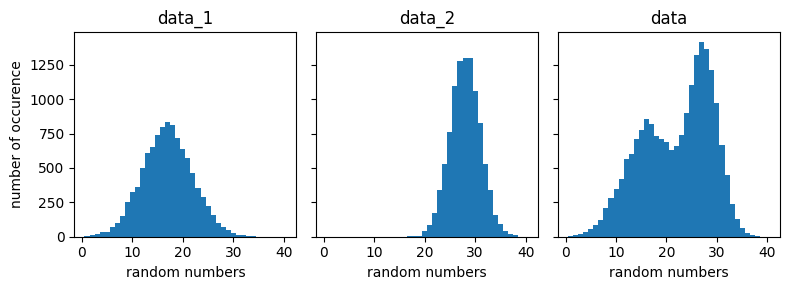

In [ ]:
# run cell to visualize data
bins = np.arange(start=0.5, stop=41.5, step=1).tolist()
fig, axs = plt.subplots(ncols=3, figsize=(8, 3), sharey=True, sharex=True)
_ = axs[0].hist(data_1, bins=bins)
_ = axs[1].hist(data_2, bins=bins)
_ = axs[2].hist(data, bins=bins)
for ax in axs: ax.set_xlabel("random numbers")
for ax, t in zip(axs, ["data_1", "data_2", "data"]): ax.set_title(t)
axs[0].set_ylabel("number of occurence")
fig.tight_layout()

##### 1.2 Calculate the mean, median, and mode of ``data`` and store the values in ``data_mean``, ``data_median``, and ``data_mode``. Make sure that ``data_mode`` is of type int:

**Hint**: You can use either ``numpy`` or ``scipy.stats`` functions for that.

In [ ]:
# Mean
data_mean = np.mean(data)

# Median
data_median = np.median(data)

# Mode
mode = stats.mode(data)
data_mode = int(mode[1])

In [ ]:
# run test to check your implementation
assert type(data_mode) == int, "Check your conversion to int of data_mode"
assert data_mean > 15 and data_median > 15 and data_mode > 15, "Check the calculation"

##### 1.3 Replace all points of ``data`` that are more than two standard deviations away from the mean with ``data_median`` and save the corrected version as ``data_corrected``:

**Hint**: Check out if [scipy.stats.zscore](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) can help you with this task.

In [ ]:
ZScore = stats.zscore(data)
data_corrected = np.array(data, copy=True)
data_corrected [np.abs(ZScore) >= 2]= data_median

In [ ]:
# run tests to check your implementation
assert np.min(data_corrected) > np.min(data) and np.max(data_corrected) < np.max(data), "Check whether you replaced outliers on both sides of the mean"
assert np.sum(data_corrected == data_median) > 1000, "Check if you replace all outliers with data_median"

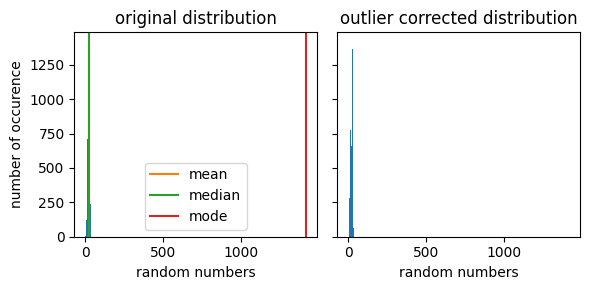

In [ ]:
# run cell to visualize both distributions
bins = np.arange(start=0.5, stop=41.5, step=1).tolist()
fig, axs = plt.subplots(ncols=2, figsize=(6, 3), sharey=True, sharex=True)
_ = axs[0].hist(data, bins=bins)
axs[0].set_title("original distribution")
axs[0].set_xlabel("random numbers")
axs[0].set_ylabel("number of occurence")
for val, key, c in zip([data_mean, data_median, data_mode], ["mean", "median", "mode"], ["tab:orange", "tab:green", "tab:red"]):
    axs[0].axvline(val, color=c, label=key)
axs[0].legend()
_ = axs[1].hist(data_corrected, bins=bins)
axs[1].set_title("outlier corrected distribution")
axs[1].set_xlabel("random numbers")
fig.tight_layout()

#### 2. Questionnaire Analysis
In this task, we use a dataset where 38 participants filled out the Positive and Negative Affect Schedule (PANAS) questionnaire before (pre) and after (post) undergoing a study protocol. The PANAS questionnaire is a self-report questionnaire consisting of 20 adjectives (like interested or ashamed) that describe different sensations and feelings. The participants rate all items individually on a 5-point scale indicating how strongly they felt this way. By averaging the scores of 10 of the items, Positive Affect and Negative Affect can be calculated. By averaging the inverted Negative Affect and Positive Affect scores, a Total score over all items can be computed.

stats_sample.csv: 0.00B [00:00, ?B/s]

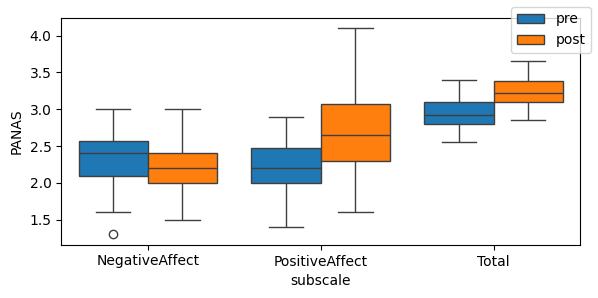

In [ ]:
# run cell to load and visualize data
data_panas = bp.example_data.get_stats_example()
fig, ax = plt.subplots(figsize=(6, 3))
bp.plotting.feature_boxplot(data=data_panas, x="subscale", y="PANAS", hue="time", hue_order=["pre", "post"], ax=ax)
fig.tight_layout()

In [ ]:
# run cell to visualize the data frame structure
data_analysis = data_panas.reset_index()
data_analysis.head()

,subject,subscale,time,PANAS
0,Vp01,NegativeAffect,post,2.2
1,Vp01,NegativeAffect,pre,2.2
2,Vp01,PositiveAffect,post,2.8
3,Vp01,PositiveAffect,pre,2.4
4,Vp01,Total,post,3.3


##### 2.1 Perform a statistical analysis for the PANAS data stored in ``data_analysis`` to test for differences between group means (differences between pre and post questionnaires separately for all the subscales):
* Follow the guidelines described in the lecture slides or provided by [pingouin](https://pingouin-stats.org/build/html/guidelines.html)
* You should use the ``pingouin`` functions for your analysis
* Store your results in a data frame called ``results_statistics``
    * ``results_statistics`` should have one row for the results of every subscale and all the outputs of the ``pingouin`` function as columns
    * Set the subscales as the indices of ``results_statistics``

**Hint**: The [pingouin guidelines](https://pingouin-stats.org/build/html/guidelines.html) already show the respective *functions* for the statistical tests.

In [211]:
# FDR-corrected post hocs with Hedges'g effect size

results_statistics = pd.DataFrame()

subscales = data_analysis['subscale'].unique()

#results_statistics.index = subscales

for subscale in subscales:

  # Move in each subscale
  data_ = data_analysis[data_analysis['subscale'] == subscale]

  # Run the correlation test
  initial_result = pg.pairwise_tests(data=data_, dv='PANAS', within='time', subject='subject',
                             parametric=True, padjust='fdr_bh', effsize='hedges')
  # Set the index
  initial_result.index = [subscale]

  # Add the constructed result to the dataframe
  results_statistics = pd.concat([results_statistics, initial_result], axis=0)

# Pretty printing of table
pg.print_table(results_statistics, floatfmt='.3f')
results_statistics.head()


POST HOC TESTS

Contrast    A     B    Paired    Parametric         T     dof  alternative      p-unc         BF10    hedges
----------  ----  ---  --------  ------------  ------  ------  -------------  -------  -----------  --------
time        post  pre  True      True          -1.335  37.000  two-sided        0.190        0.396    -0.216
time        post  pre  True      True           6.025  37.000  two-sided        0.000    28500.000     0.975
time        post  pre  True      True           7.489  37.000  two-sided        0.000  1968000.000     1.386



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
NegativeAffect,time,post,pre,True,True,-1.335466,37.0,two-sided,1.898819e-01,0.396,-0.216180
PositiveAffect,time,post,pre,True,True,6.025414,37.0,two-sided,5.800427e-07,2.85e+04,0.974708
Total,time,post,pre,True,True,7.488770,37.0,two-sided,6.391415e-09,1.968e+06,1.386081


In [212]:
# run tests to check your implementation
assert type(results_statistics) == pd.DataFrame, "Check if results_statistics is of type pandas.DataFrame"
assert results_statistics.shape[0] == 3, "Check if you performed and stored the results for all subscales"
assert list(results_statistics.index) == ["NegativeAffect", "PositiveAffect", "Total"], "Check if you set the indices correctly"
assert results_statistics["Paired"].sum() == 3, "Check your analysis parameters"
assert list(results_statistics["Contrast"])[0] == "time" and list(results_statistics["A"])[0] == "post" and list(results_statistics["B"])[0] == "pre", "Check your analysis parameters"
pval = list(results_statistics["p-unc"])
assert pval[0] < 0.2 and pval[1] < 0.0000006 and pval[2] < 0.000000007, "Check your analysis parameters"

#### 3. Cortisol Analysis
In this task, we will use data from the same study as in the last assignment, which investigated the capability of the Cold Face Test (CFT) to reduce acute stress. Two groups underwent a similar study protocol, while the Control group performed a resting period and the Intervention group a CFT between study phases. This time we will not look at heart rate data but at cortisol values extracted from saliva samples that have been taken before and after the study phase.

cortisol_sample.csv: 0.00B [00:00, ?B/s]

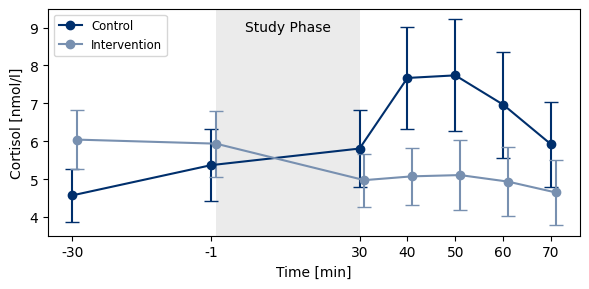

In [213]:
# run cell to load and visualize data
data_cortisol = bp.example_data.get_saliva_example()
sample_times = [-30, -1, 30, 40, 50, 60, 70]
fig, ax = plt.subplots(figsize=(6, 3))
bp.protocols.plotting.saliva_plot(
    data=data_cortisol, saliva_type="cortisol", sample_times=sample_times, test_times=[0, 30], sample_times_absolute=True,
    test_title="Study Phase", ax=ax,
);

In [214]:
# run cell to extract features from cortisol data using BioPsyKit
auc = bp.saliva.auc(
    data_cortisol, saliva_type="cortisol", sample_times=sample_times, compute_auc_post=True, remove_s0=True
)
max_inc = bp.saliva.max_increase(data_cortisol, saliva_type="cortisol", remove_s0=True)
slope = bp.saliva.slope(data_cortisol, sample_idx=[1, 4], sample_times=sample_times, saliva_type="cortisol")

cort_features = pd.concat([auc, max_inc, slope], axis=1)
cort_features = bp.saliva.utils.saliva_feature_wide_to_long(cort_features, saliva_type="cortisol")
data_analysis = cort_features.reset_index()
data_analysis.head()

,condition,subject,saliva_feature,cortisol
0,Control,Vp03,auc_g,870.418075
1,Control,Vp03,auc_i,-72.035925
2,Control,Vp03,auc_i_post,104.057250
3,Control,Vp03,max_inc,0.956000
4,Control,Vp03,slope14,0.013971


##### 3.1 Preparatory Analysis 1: Perform a Normality Check on ``data_analysis`` to test whether our samples come from a normal distribution:
* Use the [pingouin.normality](https://pingouin-stats.org/build/html/generated/pingouin.normality.html) function
* Perform the check for every feature-condition combination
* Store your results in a data frame called ``results_normality``
    * ``results_normality`` should have one row for every feature-condition combination and all the outputs of the pingouin function as columns
    * Set the index of ``results_normality`` to ``saliva_feature`` and ``condition`` (in this order), set the index names accordingly
* Sort the index of ``results_normality`` after performing all the tests

In [231]:
data_analysis.index
data_analysis['saliva_feature'].unique()
data_analysis['condition'].unique()
len(data_analysis)

130

In [245]:
# FDR-corrected post hocs with Hedges'g effect size

results_normality = pd.DataFrame()

features = data_analysis['saliva_feature'].unique()

for feature in features:
  #print(feature)
  # Move in each feature
  data_ = data_analysis[data_analysis['saliva_feature'] == feature]

  # Run the normality test
  initial_result = pg.normality(data=data_, dv='cortisol', group='condition',
                                method='shapiro', alpha=0.1)
  # Set the index
  multi_index = pd.MultiIndex.from_tuples([(feature,cond) for cond in initial_result.index], names=['saliva_feature', 'condition'])
  initial_result.index = multi_index

  # Add the constructed result to the dataframe
  results_normality = pd.concat([results_normality, initial_result], axis=0)

  #print(f'end of the loop for {feature}')

# Pretty printing of table
pg.print_table(results_normality, floatfmt='.3f')
results_normality.head()

    W    pval  normal
-----  ------  --------
0.899   0.129  True
0.896   0.117  True
0.836   0.019  False
0.950   0.601  True
0.853   0.031  False
0.941   0.475  True
0.854   0.032  False
0.983   0.992  True
0.857   0.035  False
0.965   0.833  True



W      pval  normal
saliva_feature condition                               
auc_g          Control       0.898948  0.129354    True
               Intervention  0.895831  0.117228    True
auc_i          Control       0.836432  0.019092   False
               Intervention  0.950165  0.600787    True
auc_i_post     Control       0.852757  0.030958   False

In [246]:
# run tests to check your implementation
assert type(results_normality) == pd.DataFrame, "Check if results_normality is of type pandas.DataFrame"
assert results_normality.shape[0] == 10, "Check if you performed and stored the results for all condition-saliva feature combinations"
assert list(results_normality.index.names) == ["saliva_feature", "condition"], "Check if you set the names and order of your indices correctly, saliva_feature comes first"
assert list(results_normality.columns) == ["W", "pval", "normal"], "Check if you performed the right analysis"
assert type(results_normality.index) == pd.MultiIndex and list(results_normality.index.names) == ["saliva_feature", "condition"], "Check if you set saliva feature and condition as index"
assert list(results_normality.index.get_level_values(1)) == ["Control", "Intervention"] * 5, "Check if you sorted your index"
assert results_normality["normal"].to_list() == [True, True, False, True, False, True, False, True, False, True], "Check if you set the parameters correctly"

##### 3.2 Preparatory Analysis 2: Perform a Homoscedasticity Check on ``data_analysis`` to test for the equality of variances:
* Use the [pingouin.homoscedasticity](https://pingouin-stats.org/build/html/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity) function
* Perform the check for every feature
* Store your results in a data frame called ``results_variance``
    * ``results_variance`` should have one row for every feature and all the outputs of the pingouin function as columns
    * Set the saliva features as the indices of ``results_variance``

In [252]:
# FDR-corrected post hocs with Hedges'g effect size

results_variance = pd.DataFrame()

features = data_analysis['saliva_feature'].unique()

for feature in features:
  # Move in each feature
  data_ = data_analysis[data_analysis['saliva_feature'] == feature]

  # Run the normality test
  initial_result = pg.homoscedasticity(data=data_, dv='cortisol', group='condition', alpha=0.1)

  # Set the index
  initial_result.index = [feature]
  initial_result.index.name = 'saliva_feature'

  # Add the constructed result to the dataframe
  results_variance = pd.concat([results_variance, initial_result], axis=0)

  #print(f'end of the loop for {feature}')

# Pretty printing of table
pg.print_table(results_variance, floatfmt='.3f')
results_variance.head()

    W    pval  equal_var
-----  ------  -----------
1.973   0.173  True
1.000   0.327  True
0.255   0.619  True
1.946   0.176  True
0.783   0.385  True



,W,pval,equal_var
saliva_feature,,,
auc_g,1.972959,0.172945,True
auc_i,0.999657,0.327368,True
auc_i_post,0.254504,0.618522,True
max_inc,1.946181,0.175776,True
slope14,0.782662,0.385106,True


In [253]:
# run tests to check your implementation
assert type(results_variance) == pd.DataFrame, "Check if results_variance is of type pandas.DataFrame"
assert results_variance.shape[0] == 5, "Check if you performed the test for all 5 saliva features"
assert list(results_variance.columns) == ["W", "pval", "equal_var"], "Check if you performed the right analysis"
assert type(results_variance.index) == pd.Index and list(results_variance.index.names) ==["saliva_feature"], "Check if you set only saliva_feature as index"
assert list(results_variance.index) == ["auc_g", "auc_i", "auc_i_post", "max_inc", "slope14"], "Check if you set the index correctly"
assert list(results_variance["equal_var"]) == [True] * 5, "Check if you set the parameters correctly"

##### 3.3 Statistical Test: Perform a statistical analysis for the cortisol features stored in ``data_analysis`` to test for differences between group means (differences between conditions separately for all the saliva features):
* Follow the guidelines described in the lecture slides or provided by [pingouin](https://pingouin-stats.org/build/html/guidelines.html)
* You should use the ``pingouin`` functions for your analysis
* Store your results in a data frame called ``results_statistics``
    * ``results_statistics`` should have one row for every saliva feature and all the outputs of the ``pingouin`` function as columns
    * Set the saliva features as the indices of ``results_statistics``

**Hint**: Since we computed features on dependent saliva samples, you should have a look into statistical tests with a *mixed design*.

In [287]:
data_analysis.head()
data_ = data_analysis[data_analysis['saliva_feature'] == 'auc_g']
data_['condition'].unique()
initial_result = pg.pairwise_tests(data=data_, dv='cortisol', between='condition', subject='subject',
                                     parametric=True, marginal=True, alpha=0.4, padjust='fdr_bh', effsize='hedges')

In [288]:
# FDR-corrected post hocs with Hedges'g effect size

results_statistics = pd.DataFrame()

features = data_analysis['saliva_feature'].unique()

#results_statistics.index = subscales

for feature in features:

  # Move in each subscale
  data_ = data_analysis[data_analysis['saliva_feature'] == feature]

  # Run the correlation test
  initial_result = pg.pairwise_tests(data=data_, dv='cortisol', between='condition', subject='subject',
                                     parametric=True, padjust='fdr_bh', effsize='hedges')
  # Set the index
  initial_result.index = [feature]

  # Add the constructed result to the dataframe
  results_statistics = pd.concat([results_statistics, initial_result], axis=0)

# Pretty printing of table
pg.print_table(results_statistics, floatfmt='.3f')
results_statistics.head()


POST HOC TESTS

Contrast    A        B             Paired    Parametric        T     dof  alternative      p-unc    BF10    hedges
----------  -------  ------------  --------  ------------  -----  ------  -------------  -------  ------  --------
condition   Control  Intervention  False     True          0.934  24.000  two-sided        0.359   0.500     0.355
condition   Control  Intervention  False     True          1.971  24.000  two-sided        0.060   1.439     0.749
condition   Control  Intervention  False     True          1.911  24.000  two-sided        0.068   1.330     0.726
condition   Control  Intervention  False     True          2.170  24.000  two-sided        0.040   1.896     0.824
condition   Control  Intervention  False     True          2.201  24.000  two-sided        0.038   1.984     0.836



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
auc_g,condition,Control,Intervention,False,True,0.934452,24.0,two-sided,0.359378,0.5,0.354948
auc_i,condition,Control,Intervention,False,True,1.970669,24.0,two-sided,0.060402,1.439,0.748551
auc_i_post,condition,Control,Intervention,False,True,1.910518,24.0,two-sided,0.068085,1.33,0.725703
max_inc,condition,Control,Intervention,False,True,2.169696,24.0,two-sided,0.040155,1.896,0.824150
slope14,condition,Control,Intervention,False,True,2.201028,24.0,two-sided,0.037595,1.984,0.836051


In [289]:
# run tests to check your implementation
assert type(results_statistics) == pd.DataFrame, "Check if results_statistics is of type pandas.DataFrame"
assert results_statistics.shape[0] == 5, "Check if you performed the test for all the saliva features"
assert results_statistics["Paired"].sum() == 0, "Check your analysis parameters"
assert list(results_statistics["Contrast"])[0] == "condition" and list(results_statistics["A"])[0] == "Control" and list(results_statistics["B"])[0] == "Intervention", "Check your analysis parameters"
assert results_statistics.loc["auc_g", "p-unc"].round(3) == 0.359, "Check if you performed the right type of test"
assert results_statistics.loc["auc_i", "p-unc"].round(3) == 0.06, "Check if you performed the right type of test"
assert results_statistics.loc["auc_i_post", "p-unc"].round(3) == 0.068, "Check if you performed the right type of test"
assert results_statistics.loc["max_inc", "p-unc"].round(3) == 0.04, "Check if you performed the right type of test"
assert results_statistics.loc["slope14", "p-unc"].round(3) == 0.038, "Check if you performed the right type of test"